In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from edge_pydb import EdgeTable
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
def fluxplt(ax=None, line='co', file1='de20', file2=None, 
           col1='Dilated', col2='Nomask', dolog=False, donames=False):   
    # --- Read the data
    alldata = EdgeTable('edge_coflux_'+file1+'.csv')
    if file2 != file1 and file2 is not None:
        data2 = EdgeTable('edge_coflux_'+file2+'.csv')
        alldata.join(data2)
    else:
        file2 = file1        
    # --- Get values and errors
    xdat = alldata[line+col1+'_'+file1]
    xerr = alldata[line+'e'+col1+'_'+file1]
    ydat = alldata[line+col2+'_'+file2]
    yerr = alldata[line+'e'+col2+'_'+file2]
    minval = np.nanmin(np.concatenate([xdat,ydat]))
    maxval = np.nanmax(np.concatenate([xdat,ydat]))
    minarr = np.minimum(xdat,ydat)
    nplot = np.count_nonzero(~np.isnan(minarr))
    # --- Make the plot
    ax.errorbar(xdat, ydat, xerr=xerr, yerr=yerr, 
        capsize=0, ls='none', color='blue', elinewidth=1)
    if donames == True:
        for xpos, ypos, name in zip(xdat, ydat, alldata['Name']):
            ax.annotate(name, (xpos,ypos), xytext=(-3,4), 
                        size='medium', textcoords='offset points',
                        horizontalalignment='right',zorder=3)
    ax.text(0.04,0.9,'N='+str(nplot),fontsize='large',ha='left',
            transform=ax.transAxes)
    ax.set_xlabel(col1+' '+file1, labelpad=4, size='x-large')
    ax.set_ylabel(col2+' '+file2, labelpad=3, size='x-large')
    ax.tick_params(axis='both', labelsize='large')
    if dolog == True:
        ax.set_xscale("log")
        ax.set_yscale("log")
    xmod = np.arange(minval,maxval)
    ax.plot(xmod,xmod,color='r')
    ax.set_aspect('equal')
    return

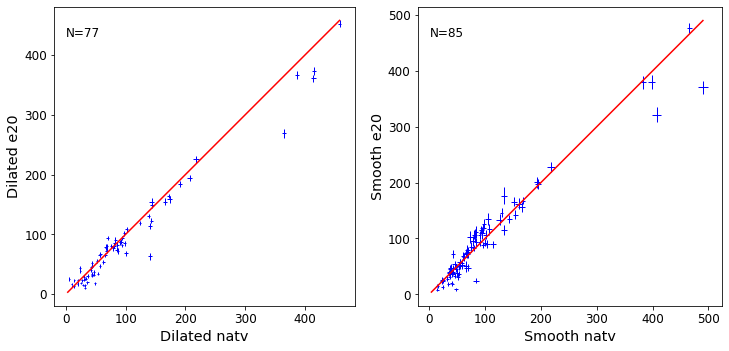

In [3]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5.5))
fluxplt(ax=ax1, file1='natv', file2='e20', col1='Dilated', col2='Dilated', dolog=False)
fluxplt(ax=ax2, file1='natv', file2='e20', col1='Smooth', col2='Smooth', dolog=False)

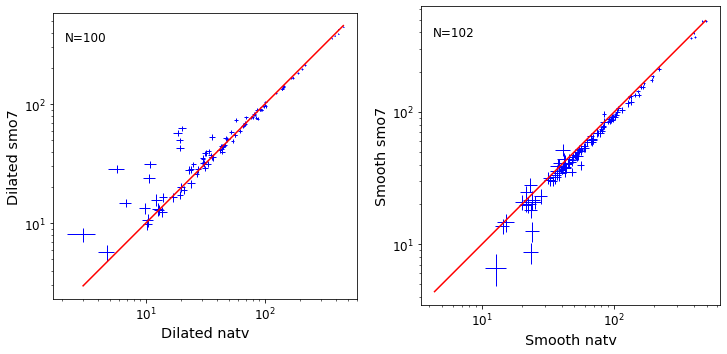

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5.5))
fluxplt(ax=ax1, file1='natv', file2='smo7', col1='Dilated', col2='Dilated', dolog=True)
fluxplt(ax=ax2, file1='natv', file2='smo7', col1='Smooth', col2='Smooth', dolog=True)

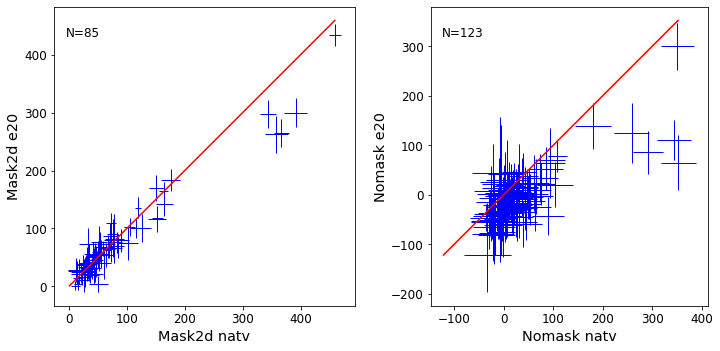

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5.5))
fluxplt(ax=ax1, file1='natv', file2='e20', col1='Mask2d', col2='Mask2d', dolog=False)
fluxplt(ax=ax2, file1='natv', file2='e20', col1='Nomask', col2='Nomask', dolog=False)

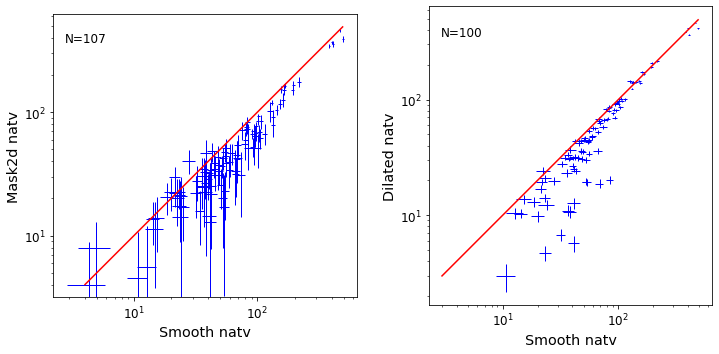

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5.5))
fluxplt(ax=ax1, file1='natv', file2='natv', col1='Smooth', col2='Mask2d', dolog=True)
fluxplt(ax=ax2, file1='natv', file2='natv', col1='Smooth', col2='Dilated', dolog=True)

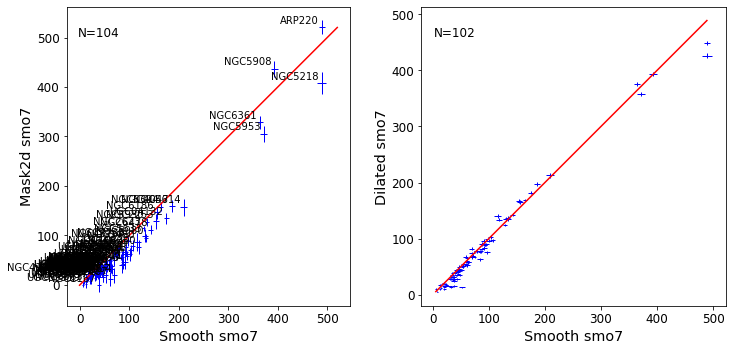

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5.5))
fluxplt(ax=ax1, file1='smo7', file2='smo7', col1='Smooth', col2='Mask2d', dolog=False, donames=True)
fluxplt(ax=ax2, file1='smo7', file2='smo7', col1='Smooth', col2='Dilated', dolog=False)